# EXPLORATORY DATA ANALYSIS OF BACK ORDERS


# Problem Statement:
Classify the products whether they would go into Backorder (Yes or No) based on the historical data from inventory, supply chain and sales.

# The target variable to predict consists of two values:
“Yes” - If the Product predicted to go to Backorder\
“No”- If the Product predicted to be not going to Backorder\
(Binary Classification problem.)

# Defining Variables:

•	Sku(Stock Keeping unit) : The product id\

•	National_inv: The present inventory level of the product\

•	Lead_time: Transit time of the product\

•	In_transit_qty: The amount of product in transit\

•	Forecast_3_month, Forecast_6_month, Forecast_9_month: Forecast of the sales of the product for coming 3, 6 and 9 months respectively\

•	Sales_1_month, sales_3_month, sales_6_month, sales_9_month: Actual sales of the product in last 1, 3 ,6 and 9 months respectively\

•	Min_bank: Minimum amount of stock recommended\

•	Potential_issue: Any problem identified in the product/part\

•	Pieces_past_due: Number of parts of the product overdue if any\

•	Perf_6_month_avg, perf_12_month_avg: Product performance over past 6 and 12 months respectively\

•	Local_bo_qty: Amount of stock overdue\

•	Deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop: Different Flags (Yes or No) set for the product\

•	Went_on_backorder: Target variable

# Table of Content
##### 1. Import Libraries
##### 2. Read Data
##### 3. Data Analysis and Preparation
##### 4. Missing Values
##### 5. Understand the Dataset
##### 6. Summary Statistics
##### 7. Distribution of Variables
##### 8. Discover Outliers
##### 9. Correlation
##### 10. Prepare the Data


# 1. Import Libraries
Import the required libraries and functions

In [1]:
# 'Os' is used for data manipulation and analysis
import os
# 'Pandas' is used for data manipulation and analysis
import pandas as pd
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns
# suppress display of warnings
from warnings import filterwarnings
filterwarnings('ignore')     
pd.options.display.float_format = '{:.6f}'.format

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# "chdir" is used to change the current working directory to specified path
os.chdir(r"C:\Users\91981\Downloads")

# 2. Read Data
Read and display data to get an insight into the data

In [4]:
# "pd.read_csv" is used to read the csv file format using pandas
hd = pd.read_csv("BackOrders.csv")

In [5]:
# display the top 5 rows of the dataframe
hd.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.000000,-99.000000,0,No,No,Yes,Yes,No,No
1,1870557,7,2.000000,0,0,0,0,0,0,0,...,0,0.500000,0.280000,0,Yes,No,No,Yes,No,No
2,1475481,258,15.000000,10,10,77,184,46,132,256,...,0,0.540000,0.700000,0,No,No,No,Yes,No,No
3,1758220,46,2.000000,0,0,0,0,1,2,6,...,0,0.750000,0.900000,0,Yes,No,No,Yes,No,No
4,1360312,2,2.000000,0,4,6,10,2,2,5,...,0,0.970000,0.920000,0,No,No,No,Yes,No,No


#### Lets take a glance at our dataframe and see how it looks

In [6]:
# display the bottom 5 rows of the dataframe
hd.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
61584,1397275,6,8.000000,0,24,24,24,0,7,9,...,0,0.980000,0.980000,0,No,No,No,Yes,No,No
61585,3072139,130,2.000000,0,40,80,140,18,108,230,...,0,0.510000,0.280000,0,No,No,No,Yes,No,No
61586,1909363,135,9.000000,0,0,0,0,10,40,65,...,0,1.000000,0.990000,0,No,No,Yes,Yes,No,No
61587,1845783,63,NaN,0,0,0,0,452,1715,3425,...,0,-99.000000,-99.000000,1,No,No,No,No,No,Yes
61588,1200539,0,2.000000,0,8,8,8,0,1,1,...,0,0.790000,0.780000,0,Yes,No,No,Yes,No,Yes


In [7]:
# info () method prints information about the DataFrame.
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61589 entries, 0 to 61588
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                61589 non-null  int64  
 1   national_inv       61589 non-null  int64  
 2   lead_time          58186 non-null  float64
 3   in_transit_qty     61589 non-null  int64  
 4   forecast_3_month   61589 non-null  int64  
 5   forecast_6_month   61589 non-null  int64  
 6   forecast_9_month   61589 non-null  int64  
 7   sales_1_month      61589 non-null  int64  
 8   sales_3_month      61589 non-null  int64  
 9   sales_6_month      61589 non-null  int64  
 10  sales_9_month      61589 non-null  int64  
 11  min_bank           61589 non-null  int64  
 12  potential_issue    61589 non-null  object 
 13  pieces_past_due    61589 non-null  int64  
 14  perf_6_month_avg   61589 non-null  float64
 15  perf_12_month_avg  61589 non-null  float64
 16  local_bo_qty       615

#### Dimensions of the data

In [8]:
# 'shape' function gives the total number of rows and columns in the data
hd.shape

(61589, 23)

- There are in total 61589 data points and 23 features in dataset. 
- Out of the 23 features 22 are independent variable and 1 is dependent variable (Target Variable).
- The target variable is went_on_backorder.

# 3.Data Analysis and Preparation
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and prepare data to perform classification techniques


In [9]:
# 'dtypes' gives the data type for each column
hd.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [10]:
# isnull().sum() returns the sum of total no of missing values in each and every column.
hd.isnull().sum()

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [11]:
# [feature].isnull().sum() is used to know in which column value is missing.
null_values = [feature for feature in hd.columns if hd[feature].isnull().sum()]
null_values

['lead_time']

- The feature lead_time has missing values.
- The number of missing values are 3403.
- The missing values is 5.5% of overall dataset. Hence these values can be dropped or they can be replaced with mean.

In [12]:
#From above we can see there are 3403 nulll values, so we will remove the null values.
hd.dropna(inplace = True)

The null values can also be replaced by mean but they only constitute 5%, hence the data was dropped.

#### 1. For numerical variables, use the describe()

In [13]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
hd.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000
mean,2036022.734885,281.245987,7.559619,31.338123,178.092909,331.301396,477.100196,45.347575,153.180610,288.828137,428.908053,43.424415,1.696766,-0.840541,-0.416599,1.259977
std,655977.881087,4321.329801,6.498952,814.665767,5438.487029,10054.555714,14609.023092,1408.074630,5360.176586,9101.474366,13041.833392,979.291691,43.525034,12.567315,10.786604,30.819641
min,1111623.000000,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1497660.500000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680000,0.670000,0.000000
50%,1896924.000000,10.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,4.000000,6.000000,0.000000,0.000000,0.830000,0.820000,0.000000
75%,2313823.000000,55.000000,8.000000,0.000000,14.000000,28.000000,42.000000,6.000000,18.000000,36.000000,54.000000,4.000000,0.000000,0.970000,0.950000,0.000000
max,3284895.000000,673445.000000,52.000000,170976.000000,1126656.000000,2094336.000000,3062016.000000,295197.000000,934593.000000,1799099.000000,2631590.000000,192978.000000,7392.000000,1.000000,1.000000,2999.000000


- From the above describe we can see that the scale of all features are not same. So, scaling needs to be done.
- In some of the features  like perf_6_month_avg & perf_12_month_avg the mean and min are negative that means there were some of the missing values that were replaced with -99.
- Even in some of the features it can be observed that 25%, 50%, 75% values are zero which indicates data is heavily skewed. There are some other possibilities like data is incomplete but we will be moving forward assuming data to be skewed.
- The difference between 75% and max values indicate that the data has many outliers. 

### Checking the ratios of features present in the dataset to understand the balance of the dataset.

In [14]:
# to count the values of target variable
hd.went_on_backorder.value_counts()

No     47217
Yes    10969
Name: went_on_backorder, dtype: int64

- The target variable is a categroical variables consisting "Yes" "No"
- The count of "Yes" and "No" indicates that the data is imbalance as the majority of the dataset has "No".
- 81% of data consist of "No" while 19% data consist of "Yes".
- This means the biasness of dataset needs to be fixed.

In [15]:
# to count the values of independent variable
hd.potential_issue.value_counts()

No     58107
Yes       79
Name: potential_issue, dtype: int64

In [16]:
# to count the values of independent variable
hd.oe_constraint.value_counts()

No     58174
Yes       12
Name: oe_constraint, dtype: int64

In [17]:
# to count the values of independent variable
hd.ppap_risk.value_counts()

No     50916
Yes     7270
Name: ppap_risk, dtype: int64

In [18]:
# to count the values of independent variable
hd.stop_auto_buy.value_counts()

Yes    56736
No      1450
Name: stop_auto_buy, dtype: int64

- From the above observation it can be seen that these features are categorical variables and to move forward with the creation of the predictive model Encoding needs to be done.
- All the "Yes" needs to be converted to 1 
- All the "No" needs to be converted to 0

In [19]:
# to count the values of independent variable
hd.sku.value_counts()

1870557    1
3182134    1
2890741    1
3249358    1
2806618    1
          ..
2847991    1
1778085    1
1362613    1
2249028    1
1200539    1
Name: sku, Length: 58186, dtype: int64

- From the above code we can see that all the values in feature sku is equal to number of rows in the dataset.
- This means the feature sku can be dropped.

In [20]:
#Dropping first column
hd.drop(['sku'], axis = 1,inplace=True) 

### Data Visualization

In [21]:
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
# 'Figure' module is used to control the default spacing of the subplots and top level container for all plot elements
# 'PyLab' aims to provide support for device control and experiment automation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab

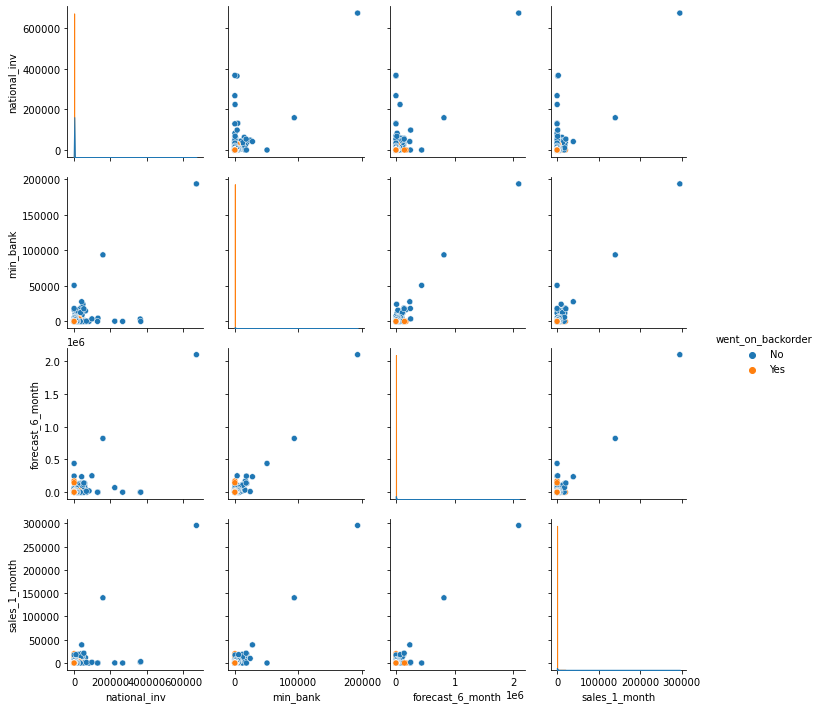

In [22]:
# pairs plot used to see both distribution of single variables and relationships between two variables and identify trends for follow-up analysis
sns.pairplot(hd[['national_inv','min_bank','forecast_6_month','sales_1_month','went_on_backorder']],hue = 'went_on_backorder')

### Boxplot for Continuous features

Text(0.5, 1.0, 'Box plot of national_inv')

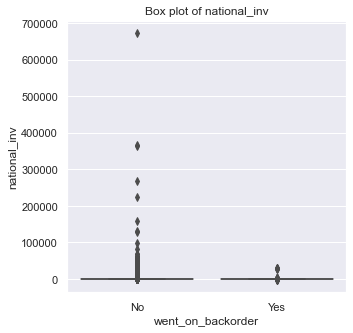

In [23]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x='went_on_backorder',y='national_inv', data=hd).set_title('Box plot of national_inv')

Text(0.5, 1.0, 'Box plot of lead_time')

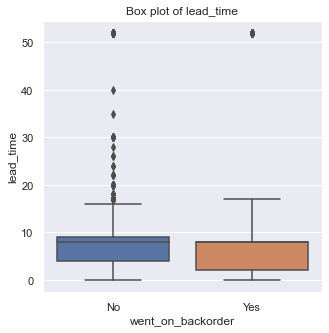

In [24]:
sns.boxplot(x='went_on_backorder',y='lead_time', data=hd).set_title('Box plot of lead_time')

Text(0.5, 1.0, 'Box plot of in_transit_qty')

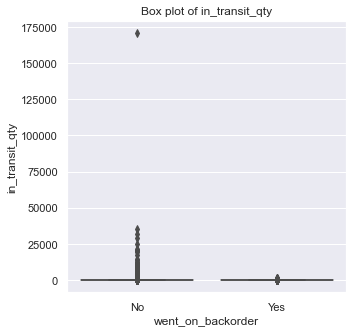

In [25]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=hd).set_title('Box plot of in_transit_qty')

Text(0.5, 1.0, 'Box plot of forecast_3_month')

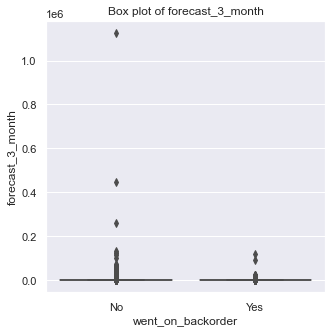

In [26]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=hd).set_title('Box plot of forecast_3_month')

Text(0.5, 1.0, 'Box plot of forecast_6_month')

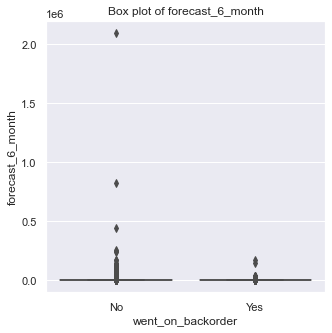

In [27]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=hd).set_title('Box plot of forecast_6_month')

Text(0.5, 1.0, 'Box plot of forecast_9_month')

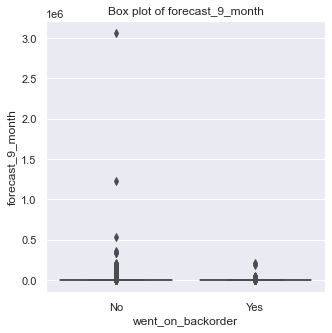

In [28]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=hd).set_title('Box plot of forecast_9_month')

Text(0.5, 1.0, 'Box plot of sales_1_month')

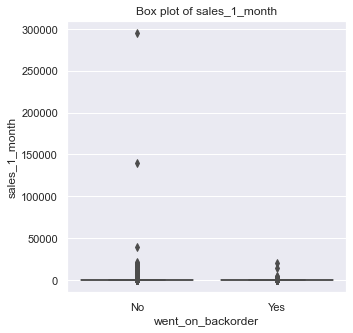

In [29]:
sns.boxplot(x='went_on_backorder',y='sales_1_month', data=hd).set_title('Box plot of sales_1_month')

Text(0.5, 1.0, 'Box plot of sales_3_month')

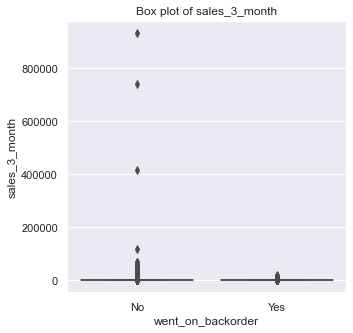

In [30]:
sns.boxplot(x='went_on_backorder',y='sales_3_month', data=hd).set_title('Box plot of sales_3_month')

Text(0.5, 1.0, 'Box plot of sales_6_month')

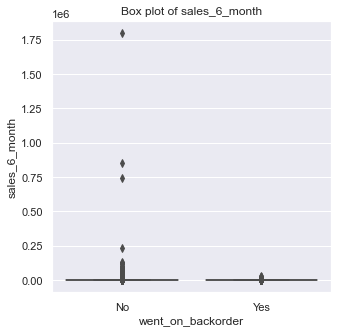

In [31]:
sns.boxplot(x='went_on_backorder',y='sales_6_month', data=hd).set_title('Box plot of sales_6_month')

Text(0.5, 1.0, 'Box plot of sales_9_month')

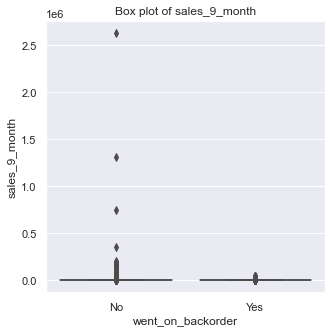

In [32]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=hd).set_title('Box plot of sales_9_month')

Text(0.5, 1.0, 'Box plot of min_bank')

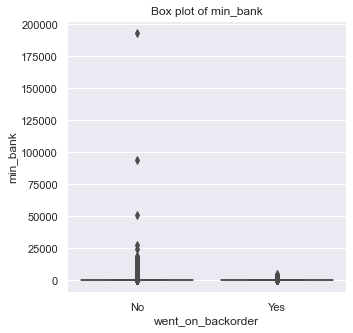

In [33]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=hd).set_title('Box plot of min_bank')

- From the above boxplot of lead time we can see that the data is somewhat equally distributed as the mean and standard deviation are close and there is less difference between 75% and max value of Lead time.
- Apart from lead time all the other features are heavily left skewed. This means data has many outliers. 
- As we know boxplot is made to higlight values between 25% and 75% but in this case we need to make boxplot containing values between 0.05% and 90%. 
- The maximum dataset has outliers so removing outliers using IQR will not be the right step.
- Even from pairplot it can be seen that all the values are not being showed.

Text(0.5, 1.0, 'Box plot of national_inv from 0.1th to 90th percentile')

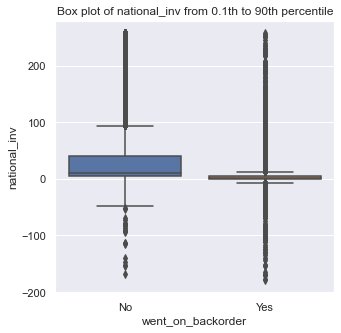

In [34]:
sns.boxplot(x='went_on_backorder',y='national_inv', data=hd[(hd.national_inv < hd.national_inv.quantile(0.90))  & (hd.national_inv > hd.national_inv.quantile(0.001)) ]).set_title('Box plot of national_inv from 0.1th to 90th percentile')

Text(0.5, 1.0, 'Box plot of in_transit_qty from 0 to 90th percentile')

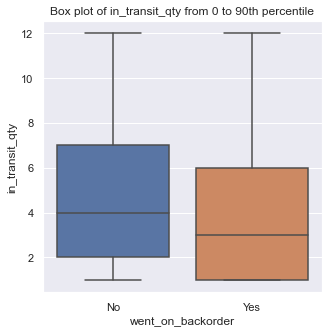

In [35]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=hd[(hd.in_transit_qty < hd.in_transit_qty.quantile(0.90))  & (hd.in_transit_qty > hd.in_transit_qty.quantile(0))]).set_title('Box plot of in_transit_qty from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_3_month from 0 to 90th percentile')

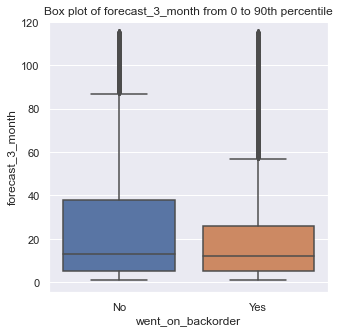

In [36]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=hd[(hd.forecast_3_month < hd.forecast_3_month.quantile(0.90))  & (hd.forecast_3_month > hd.forecast_3_month.quantile(0))]).set_title('Box plot of forecast_3_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_6_month from 0 to 90th percentile')

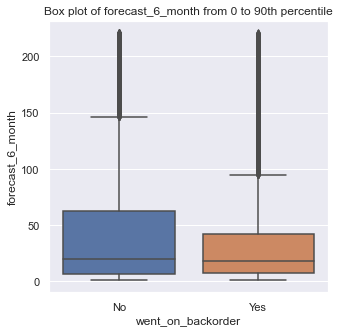

In [37]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=hd[(hd.forecast_6_month < hd.forecast_6_month.quantile(0.90))  & (hd.forecast_6_month > hd.forecast_6_month.quantile(0))]).set_title('Box plot of forecast_6_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_9_month from 0 to 90th percentile')

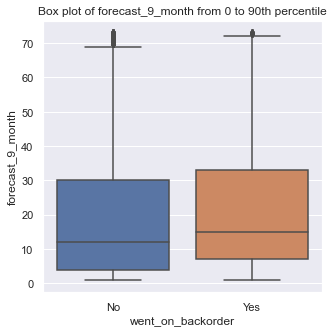

In [38]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=hd[(hd.forecast_9_month < hd.forecast_9_month.quantile(0.80))  & (hd.forecast_9_month > hd.forecast_9_month.quantile(0))]).set_title('Box plot of forecast_9_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of sales_1_month from 0 to 80th percentile')

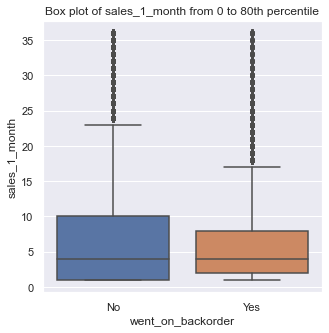

In [39]:
sns.boxplot(x='went_on_backorder',y='sales_1_month', data=hd[(hd.sales_1_month < hd.sales_1_month.quantile(0.90))  & (hd.sales_1_month > hd.sales_1_month.quantile(0))]).set_title('Box plot of sales_1_month from 0 to 80th percentile')

Text(0.5, 1.0, 'Box plot of sales_1_month from 0 to 80th percentile')

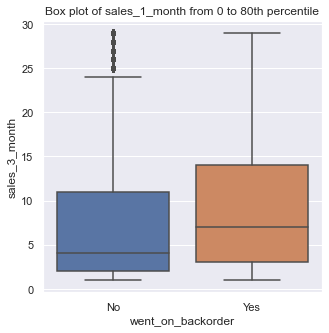

In [40]:
sns.boxplot(x='went_on_backorder',y='sales_3_month', data=hd[(hd.sales_3_month < hd.sales_3_month.quantile(0.80))  & (hd.sales_3_month > hd.sales_3_month.quantile(0))]).set_title('Box plot of sales_1_month from 0 to 80th percentile')

Text(0.5, 1.0, 'Box plot of sales_6_month from 0 to 80th percentile')

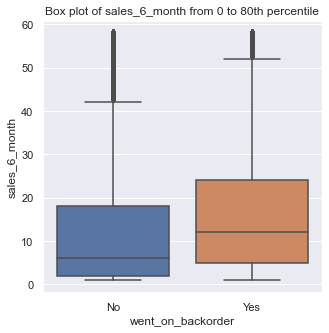

In [41]:
sns.boxplot(x='went_on_backorder',y='sales_6_month', data=hd[(hd.sales_6_month < hd.sales_6_month.quantile(0.80))  & (hd.sales_6_month > hd.sales_6_month.quantile(0))]).set_title('Box plot of sales_6_month from 0 to 80th percentile')

Text(0.5, 1.0, 'Box plot of sales_9_month from 0 to 80th percentile')

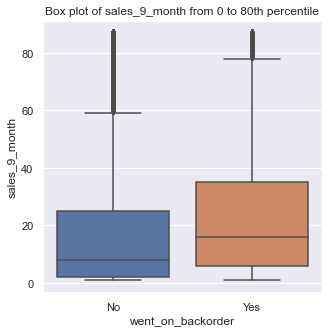

In [42]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=hd[(hd.sales_9_month < hd.sales_9_month.quantile(0.80))  & (hd.sales_9_month > hd.sales_9_month.quantile(0))]).set_title('Box plot of sales_9_month from 0 to 80th percentile')

Text(0.5, 1.0, 'Box plot of min_bank from 0 to 80th percentile')

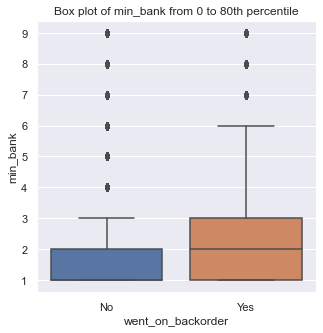

In [43]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=hd[(hd.min_bank < hd.min_bank.quantile(0.80))  & (hd.min_bank > hd.min_bank.quantile(0))]).set_title('Box plot of min_bank from 0 to 80th percentile')

Text(0.5, 1.0, 'Box plot of perf_6_month_avg from 0 to 90th percentile')

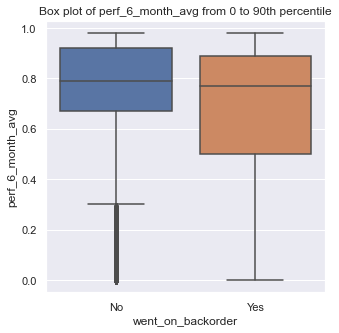

In [44]:
sns.boxplot(x='went_on_backorder',y='perf_6_month_avg', data=hd[(hd.perf_6_month_avg < hd.perf_6_month_avg.quantile(0.90))  & (hd.perf_6_month_avg > hd.perf_6_month_avg.quantile(0))]).set_title('Box plot of perf_6_month_avg from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of perf_12_month_avg from 0 to 90th percentile')

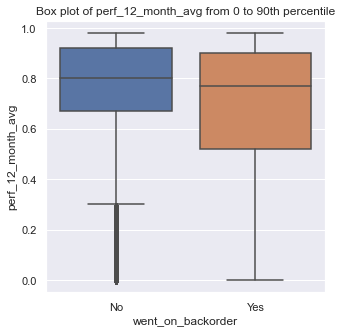

In [45]:
sns.boxplot(x='went_on_backorder',y='perf_12_month_avg', data=hd[(hd.perf_12_month_avg < hd.perf_12_month_avg.quantile(0.90))  & (hd.perf_12_month_avg > hd.perf_12_month_avg.quantile(0))]).set_title('Box plot of perf_12_month_avg from 0 to 90th percentile')

- From the above boxplot we can interpret that if we consider the consider the datapoints between 0% and 90% values most of the outliers are removed and can make some inferences.
- Changing the percentile of boxplot helped us to change the overall dataset and reduce the skewness.
- Now by changing the IQR we can make the pairplot which can help us to interpret the data more easily.


### Encoding Categorical Variables

In [46]:
hd['potential_issue'] = hd['potential_issue'].map({'No' : 0, 'Yes' : 1}).astype('int')
hd['deck_risk'] = hd['deck_risk'].map({'No' : 0, 'Yes' : 1}).astype('int')
hd['oe_constraint'] = hd['oe_constraint'].map({'No' : 0, 'Yes' : 1}).astype('int')
hd['ppap_risk'] = hd['ppap_risk'].map({'No' : 0, 'Yes' : 1}).astype('int')
hd['stop_auto_buy'] = hd['stop_auto_buy'].map({'No' : 0, 'Yes' : 1}).astype('int')
hd['went_on_backorder'] = hd['went_on_backorder'].map({'No' : 0, 'Yes' : 1}).astype('int')
hd['rev_stop'] = hd['rev_stop'].map({'No' : 0, 'Yes' : 1}).astype('int')

Encoding the categorical variables by assigning "Yes" as 1 and "No" as 0.

In [47]:
hd.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,7,2.000000,0,0,0,0,0,0,0,0,...,0,0.500000,0.280000,0,1,0,0,1,0,0
2,258,15.000000,10,10,77,184,46,132,256,365,...,0,0.540000,0.700000,0,0,0,0,1,0,0
3,46,2.000000,0,0,0,0,1,2,6,9,...,0,0.750000,0.900000,0,1,0,0,1,0,0
4,2,2.000000,0,4,6,10,2,2,5,6,...,0,0.970000,0.920000,0,0,0,0,1,0,0
5,297,12.000000,0,0,0,0,5,6,44,57,...,0,0.580000,0.750000,0,1,0,0,1,0,0


### Barplot for Categorical Features

<AxesSubplot:xlabel='went_on_backorder', ylabel='potential_issue'>

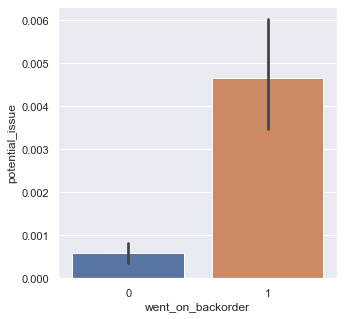

In [48]:
sns.barplot('went_on_backorder', 'potential_issue', data=hd)


- From the bargraph we can see that whenever there is potential issue there is a high chance of probability that the product will go into backorder.

<AxesSubplot:xlabel='went_on_backorder', ylabel='deck_risk'>

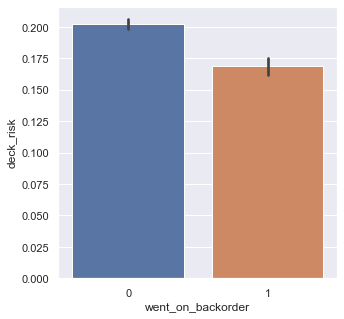

In [49]:
sns.barplot('went_on_backorder', 'deck_risk', data=hd)

<AxesSubplot:xlabel='went_on_backorder', ylabel='oe_constraint'>

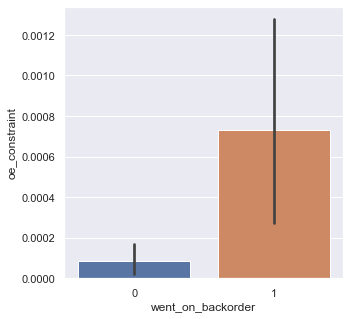

In [50]:
sns.barplot('went_on_backorder', 'oe_constraint', data=hd)

<AxesSubplot:xlabel='went_on_backorder', ylabel='ppap_risk'>

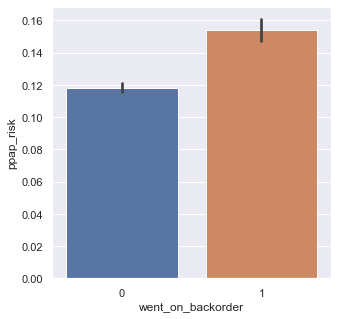

In [51]:
sns.barplot('went_on_backorder', 'ppap_risk', data=hd)

<AxesSubplot:xlabel='went_on_backorder', ylabel='stop_auto_buy'>

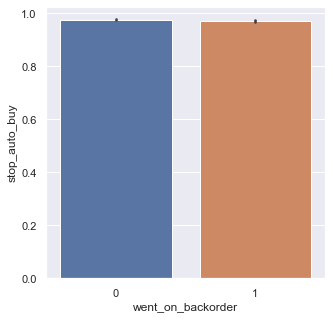

In [52]:
sns.barplot('went_on_backorder', 'stop_auto_buy', data=hd)

<AxesSubplot:xlabel='went_on_backorder', ylabel='rev_stop'>

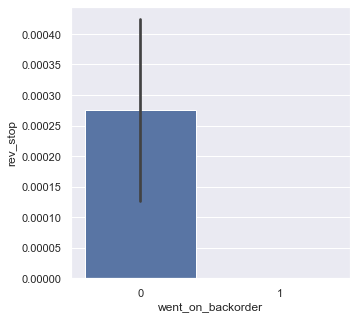

In [53]:
sns.barplot('went_on_backorder', 'rev_stop', data=hd)

- For the features: deck_risk, rev_stop whnever there is "No" flag then the product doesnt go into backorders.
- For the features: ppap_risk, oe_constraint there is "Yes" flag then the product goes into backorders.
- For the feature: auto_buy there is probability of 52% that the product will not go into backorder while there is probability of 48% that the produdct will go into backorder.

- The problem we are solving is binary classification with very high data imbalance with positive class being the minority.
- Missing values are present in Lead time column and -99.0 an unusual value in performance columns in which the remaining values are between 0 and 1


In [54]:
# splitting features and the target variable
# consider all the columns except 'RGD' using 'iloc'
hd_features = hd.iloc[:, hd.columns != 'went_on_backorder']

# consider the target variable
hd_target = hd.iloc[:, hd.columns == 'went_on_backorder']

In [55]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = hd_features.corr()

# print the correlation matrix
corrmat

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
national_inv,1.000000,0.020724,0.654611,0.660161,0.676360,0.685996,0.673300,0.556589,0.643159,0.660607,...,-0.001461,0.049947,-0.027834,-0.029246,-0.000598,-0.016666,-0.000812,-0.006437,-0.015479,-0.000808
lead_time,0.020724,1.000000,-0.005685,-0.005421,-0.005819,-0.005952,-0.006554,-0.003269,-0.004580,-0.004989,...,-0.005689,-0.004091,-0.086290,-0.096416,0.004479,0.098798,-0.007867,0.001548,-0.235616,0.000659
in_transit_qty,0.654611,-0.005685,1.000000,0.870836,0.880883,0.887675,0.899206,0.743497,0.849162,0.873089,...,0.009310,0.053663,0.003045,0.003406,0.019890,-0.016947,-0.000254,-0.003508,0.003506,0.000174
forecast_3_month,0.660161,-0.005421,0.870836,1.000000,0.996328,0.993438,0.936717,0.771806,0.884929,0.911922,...,0.015885,0.050961,0.001913,0.002122,0.028639,-0.012109,-0.000065,-0.000058,0.000762,-0.000490
forecast_6_month,0.676360,-0.005819,0.880883,0.996328,1.000000,0.998666,0.943575,0.777643,0.892022,0.919445,...,0.011460,0.050774,0.001135,0.000996,0.021558,-0.012870,-0.000083,-0.000678,0.001287,-0.000493
forecast_9_month,0.685996,-0.005952,0.887675,0.993438,0.998666,1.000000,0.952928,0.785264,0.900933,0.928750,...,0.010243,0.050235,0.000334,0.000079,0.019889,-0.013100,-0.000077,-0.001062,0.001374,-0.000488
sales_1_month,0.673300,-0.006554,0.899206,0.936717,0.943575,0.952928,1.000000,0.816341,0.936518,0.966108,...,0.003520,0.049587,0.000776,0.002378,0.022718,-0.013891,-0.000031,-0.003081,-0.001158,-0.000477
sales_3_month,0.556589,-0.003269,0.743497,0.771806,0.777643,0.785264,0.816341,1.000000,0.963986,0.929600,...,0.002634,0.039575,0.001279,0.002441,0.017975,-0.012501,0.000012,-0.003380,-0.000653,-0.000425
sales_6_month,0.643159,-0.004580,0.849162,0.884929,0.892022,0.900933,0.936518,0.963986,1.000000,0.993835,...,0.002801,0.053895,0.001582,0.002750,0.017176,-0.013952,0.000017,-0.003478,-0.000823,-0.000473
sales_9_month,0.660607,-0.004989,0.873089,0.911922,0.919445,0.928750,0.966108,0.929600,0.993835,1.000000,...,0.002420,0.056527,0.001605,0.002862,0.016116,-0.014720,-0.000022,-0.003136,-0.000890,-0.000491


##### The next step of EDA will be scaling of the dataset as there is major difference between the values of all features. Scaling can be done after treating the outliers.
##### We will scale all the numerical features and standardize all the features of the dataframe.

In [56]:
# scale all the numerical columns
# standardize all the columns of the dataframe 'df_feature'
hd_num = hd.apply(lambda rec: (rec - rec.mean()) / rec.std())

hd_num.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,-0.063463,-0.855464,-0.038467,-0.032747,-0.032950,-0.032658,-0.032205,-0.028578,-0.031734,-0.032887,...,-0.038984,0.106669,0.064580,-0.040882,2.026377,-0.014362,-0.377865,0.159864,-0.014949,-0.481982
2,-0.005379,1.144859,-0.026192,-0.030908,-0.025292,-0.020063,0.000463,-0.003951,-0.003607,-0.004900,...,-0.038984,0.109852,0.103517,-0.040882,-0.493483,-0.014362,-0.377865,0.159864,-0.014949,-0.481982
3,-0.054438,-0.855464,-0.038467,-0.032747,-0.032950,-0.032658,-0.031495,-0.028204,-0.031075,-0.032197,...,-0.038984,0.126562,0.122059,-0.040882,2.026377,-0.014362,-0.377865,0.159864,-0.014949,-0.481982
4,-0.064620,-0.855464,-0.038467,-0.032011,-0.032354,-0.031973,-0.030785,-0.028204,-0.031185,-0.032427,...,-0.038984,0.144067,0.123913,-0.040882,-0.493483,-0.014362,-0.377865,0.159864,-0.014949,-0.481982
5,0.003646,0.683246,-0.038467,-0.032747,-0.032950,-0.032658,-0.028654,-0.027458,-0.026900,-0.028517,...,-0.038984,0.113035,0.108153,-0.040882,2.026377,-0.014362,-0.377865,0.159864,-0.014949,-0.481982


We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.